1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.constants import constants, physical_constants

import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Time')

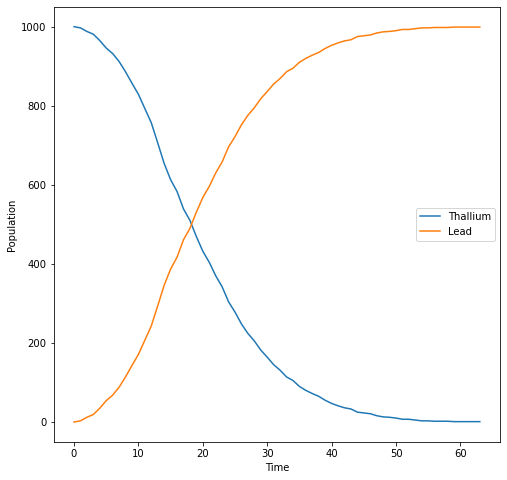

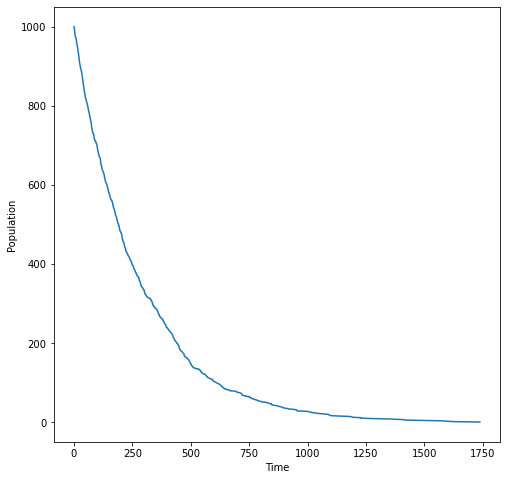

In [13]:
# first part
def die(probability,choices=[0,1]):
    prob = [probability,1-probability]
    return np.random.choice(choices, p=prob)
decay_time = 3.052 * 60
tl_atoms = 1000
lead_atoms = 0
time_step = 1
tl, lead = [], []
while tl_atoms != 0:
    tl.append(tl_atoms)
    lead.append(lead_atoms)
    prob_decay = 1-2**(-time_step/decay_time)
    dead_tl = len([die(prob_decay) for x in range(tl_atoms) if die(prob_decay) == 0])
    tl_atoms -= dead_tl
    lead_atoms +=  dead_tl
    time_step += 1
    
time_arr = np.arange(0,time_step-1)
fig = plt.figure(figsize=(8,8))
plt.plot(time_arr,tl)
plt.plot(time_arr,lead)
plt.ylabel('Population')
plt.xlabel('Time')
labels = ['Thallium', 'Lead']
plt.legend(labels)



class new_pdf(stats.rv_continuous):
    def _pdf(self,t):
        if t<0:
            return 0
        else:
            return 2**(-t/decay_time)*(np.log(2)/decay_time)
    def _cdf(self,t):
        return 1 - 2**(-t/decay_time)
N = 1000
val = np.random.random(N)
distribution = new_pdf()
dist = distribution.ppf(val)
dist = np.sort(dist)
plt.figure(figsize=(8,8))
plt.plot(dist,range(1000,0,-1))
plt.ylabel('Population')
plt.xlabel('Time')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

the hit/miss: 
1.424
1.4516877509810684
 The error is:  0.3456152967198268

MEAN VALUE:
 value of the integral = 1.4538651333242096.
 Error = 0.002177382343141243


C:\Users\HANENH~1\AppData\Local\Temp/ipykernel_52076/1076813477.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (np.sin(1/(x*(2-x))))**2
C:\Users\HANENH~1\AppData\Local\Temp/ipykernel_52076/1076813477.py:2: RuntimeWarning: invalid value encountered in sin
  return (np.sin(1/(x*(2-x))))**2
C:\Users\HANENH~1\AppData\Local\Temp/ipykernel_52076/1076813477.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result = quad(f,0,2)


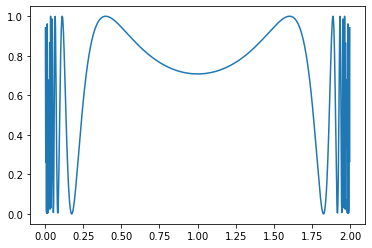

In [23]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0,2,1000)
plt.plot(x,f(x))

from scipy.integrate import *
# Monte Carlo integration
N=1000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print('the hit/miss: ')
print(I)

result = quad(f,0,2)
print(result[0])

accuracy = 100-(I/result[0])*100
print(' The error is: ',f(accuracy))

#Mean value
s = 0
for i in range(N):
    x = 2 * np.random.random()
    s += f(x)
mean = s / N

I_2 = 2 * mean
accuracy_2 = np.abs(I_2 - result[0])
print(f"\nMEAN VALUE:\n value of the integral = {I_2}.\n Error = {accuracy_2}")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [30]:
def f_2(x,y):
    if (x**2+y**2)<=1:
        return 1
    else:
        return 0
    
# Monte Carlo integration
N = 100000
count = 0
for i in range(N):
    x=np.random.random()
    y=np.random.random()
    z=np.random.random()
    if z<f_2(x,y): count+=1
I=4*count/N
print(I)

res = nquad(f_2,[[-1,1],[-1,1]])
print(res[0])

accuracy = 100-(I/res[0])*100
print(f'The error is: {np.abs(accuracy)}')

D = 10
count = 0 
for i in range(N):
    square_sum = 0
    for _ in range(D):
        square_sum += (np.random.random() * 2 - 1)**2
    if square_sum < 1: 
        count += 1

I_2 = 2**D*count/N
print(f"The volume of a {D}-dimensial sphere = {I_2}")

3.13592
1.5248947619635096
The error is: 105.64828985064358
The volume of a 10-dimensial sphere = 2.70336


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [31]:
def w(x):
    return 1.0 / np.sqrt(x)

def f(x):
    return (1.0 / ((np.exp(x) + 1.0) * np.sqrt(x)))

def g(x):
    return f(x) / w(x)

N = 10000

I_w = 2 
sum_g = np.sum(g(np.random.random(size=N) ** 2))
mean_g = sum_g / N

I = mean_g * I_w
print(f"Value of the integral = {I}")

Value of the integral = 0.8386928792025615
